# 4. Modifying constraints

In [1]:
import sys
from pathlib import Path
sys.path.append(str(Path("../../").resolve()))

%load_ext autoreload
%autoreload 2

In [20]:
import numpy as np
from pipeGEM.pipeline.algo.constraints import Eflux, GIMME
from pipeGEM.data.fetching import load_model
from pipeGEM.data.synthesis import get_syn_gene_data
from pipeGEM.integration.mapping import Expression

In [4]:
ecoli = load_model("e_coli_core")

In [21]:
ecoli_data = np.log2(get_syn_gene_data(ecoli, n_sample=10) + 1)

## pFBA / FBA

m1
m2
m3
m4
m5
m6
m7
m8
m9


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/matrix.py:1216: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


saving  None


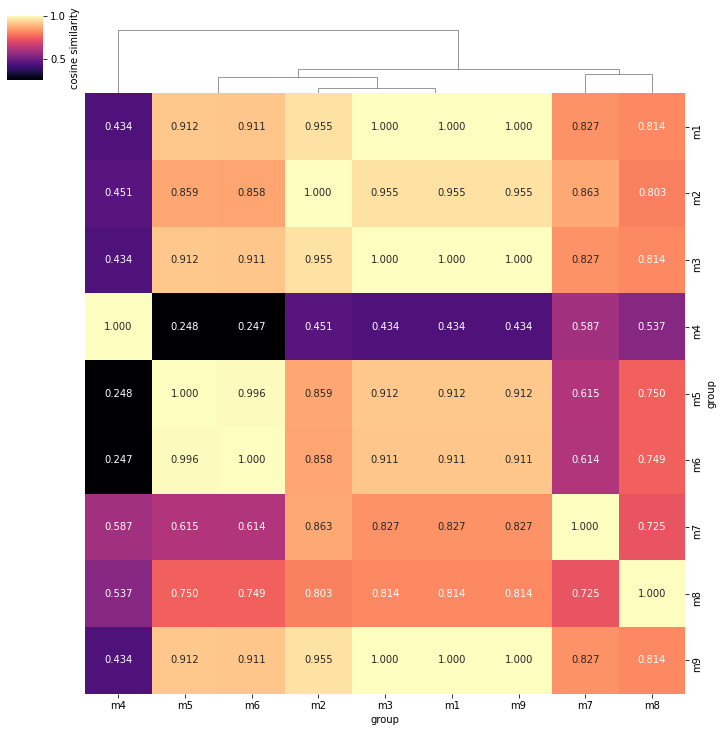

In [137]:
grp.plot_flux_heatmap(method="pFBA", constr="None", annot=True)

## FVA

## Eflux algorithm

reference: [Colijn, Caroline, et al. "Interpreting expression data with metabolic flux models: predicting Mycobacterium tuberculosis mycolic acid production." PLoS computational biology 5.8 (2009): e1000489.](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1000489)

In [23]:
eflux = Eflux(ecoli_data)

In [24]:
output = eflux(ecoli)

Max expression: 12.051888655905378 | Min expression: 11.94104760634058
Max expression: 12.054943416573325 | Min expression: 11.94178124227853
Max expression: 12.069785394983302 | Min expression: 11.946906274456397
Max expression: 12.049848549450562 | Min expression: 11.92035285541508
Max expression: 12.052228393347402 | Min expression: 11.94104760634058
Max expression: 12.06305796362349 | Min expression: 11.959277505720502
Max expression: 12.03823313473178 | Min expression: 11.95492329203032
Max expression: 12.051888655905378 | Min expression: 11.936637939002571
Max expression: 12.039261794341055 | Min expression: 11.943613701614042
Max expression: 12.054943416573325 | Min expression: 11.948732239819615
Max expression: 12.051888655905378 | Min expression: 11.94104760634058
Max expression: 12.054943416573325 | Min expression: 11.94178124227853
Max expression: 12.069785394983302 | Min expression: 11.946906274456397
Max expression: 12.049848549450562 | Min expression: 11.92035285541508
Ma

In [34]:
for sample_name, mod in output.items():
    print(sample_name)
    print(mod.reactions[1].bounds)

sample_0
(0.0, 449.8224114258125)
sample_1
(0.0, 274.2925616793226)
sample_2
(0.0, 664.9130629334751)
sample_3
(0.0, 658.0437839620216)
sample_4
(0.0, 426.1510004399561)
sample_5
(0.0, 126.25412528242157)
sample_6
(0.0, 324.68290367478824)
sample_7
(0.0, 602.140568013449)
sample_8
(0.0, 529.3669989981405)
sample_9
(0.0, 500.5226218405464)


## GIMME algorithm

reference: [Becker, Scott A., and Bernhard O. Palsson. "Context-specific metabolic networks are consistent with experiments." PLoS computational biology 4.5 (2008): e1000082.](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1000082)

In [35]:
gimme = GIMME(ecoli_data)

In [37]:
output = gimme(ecoli, low_exp=11.8, high_exp=12.1)

In [40]:
for sample_name, mod in output.items():
    print(sample_name)
    print(mod.optimize())

sample_0
<Solution -112.688 at 0x7f86a4710da0>
sample_1
<Solution -114.423 at 0x7f86a4710be0>
sample_2
<Solution -103.321 at 0x7f86a4710da0>
sample_3
<Solution -122.009 at 0x7f86a4710be0>
sample_4
<Solution -115.430 at 0x7f86a4710da0>
sample_5
<Solution -109.808 at 0x7f86a4710d68>
sample_6
<Solution -106.222 at 0x7f86a4710c18>
sample_7
<Solution -113.826 at 0x7f86a4710da0>
sample_8
<Solution -111.042 at 0x7f86a4710d68>
sample_9
<Solution -107.650 at 0x7f86a4710c18>


## RIPTiDe